# Classificação Multiclasse

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import models, layers, datasets, utils

%matplotlib inline

In [2]:
# A base de dados já está dividida em dois conjuntos: treino e teste
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
# 50000 imagens para treino
len(X_train)

50000

In [4]:
# 10000 imagens para teste
len(X_test)

10000

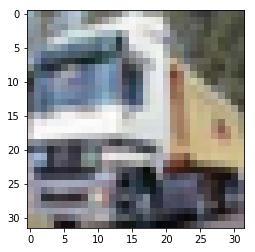

In [5]:
# Camião a cores
plt.imshow(X_train[1] )

In [6]:
# Matriz com os pixeis da imagem com o camião
# Imagem 32x32
# rgb 3
pixeis = X_train[1]
pixeis.shape

(32, 32, 3)

# Pré-Processamento dos dados

In [7]:
# 1º parametro: número de imagens
# 2º parametro: Altura da imagem (nº de pixeis da imagem na vertical).
# 3º parametro: Largura da imagem (nº de pixeis da imagem na horizontal).
# Nº de canais de RGB: 3 para imagens a cores.

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

In [8]:
type(X_train)

numpy.ndarray

### Conversão dos dados do tipo int8 para float32

In [9]:
# Como os dados vão ser convertidos para uma escala entre 0 e 1 tem-se de converter os dados de inteiro8 para float32 para que
# os valores obtidos depois da normalização não sejam inteiros e consequentemente quase todos 0(por não haver números decimais).

X_test[0,1,1]

array([151, 110,  40], dtype=uint8)

In [10]:
# Conversão dos dados em float 32
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [11]:
X_test[0,1,1]

array([151., 110.,  40.], dtype=float32)

### Normalização dos pixeis

In [12]:
# Passar os pixeis para uma escala de 0 a 1 para que o precessamento dos dados seja mais rapido
# Isto pode ser feito através da tecnica min max normalization. Como cada pixel ocupa 1 byte e o byte consegue guardar 256
# resultados possiveis(ou seja varia entre 0 e 255). 
# A normalização pode ser feita dividindo o pixel por 255 (tambem se podia utilizar o skit-learn).

# Pode-se ver que o valor máximo de um pixel é de 255
X_test[0].max()

255.0

In [13]:
X_test[0].min()

13.0

In [14]:
# Normalização do conjunto de teste e treino
X_train = X_train/255
X_test = X_test/255

In [15]:
X_test[0].max()

1.0

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


### Transformação de variaveis em dummys

In [16]:
# Como se trata de um problema de multiplas classes, cada classe tem de ter a probabilidade de pertencer a objecto.
# tem de ser um vector [50000,10] e [10000,10] (exigencia da biblioteca) e não se pode utilizar o LabelEncoder.

# As 10 classes do problema (já foram passadas de categoricas para númericas, não sendo necessario aplicar o LabelEncoder
# antes de transformar as variaveis em dummies).
# avião, automóvel, pássaro, gato, veado, cachorro, sapo, cavalo, navio e caminhão


# número 1: 1 0 0 0 0 0 0 0 0 0
# número 2: 0 1 0 0 0 0 0 0 0 0
# ....
# número 0: 0 0 0 0 0 0 0 0 0 1

# tambem se podia utilizar o pd.get_dummies()
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [17]:
y_train.shape

(50000, 10)

In [18]:
X_train.shape

(50000, 32, 32, 3)

## Modelo CNN com 2 camadas de convolução e 2 camadas ocultas

In [24]:
# sequential - uma cada apos a outra
# dense - camadas fully conected, cada neuronio esta conectado a todos os neuronios da camada seguinte

#------------------------------------------------------------------------------------------------------------------------------

# Camada de convolução (conv2D porque é uma imagem):

# Operador de convolução: multiplicação da imagem(matriz de pixeis 28x28) por um detector de caracteristicas, feature detection
# ou filtro ou kernel(matriz normalmente 3x3 para imagens pequenas) que vai originar um mapa de caracteristicas.
# Este mapa tem como objectivo filtrar(detectar) as caracteristicas mais importantes da imagem. 

# Detectores de caracteristicas:32, Utilizam-se 32 matrizes de detectores de caraceristicas que vão originar 32 mapas de
# caracteristicas. Estes detectores de caracteristicas são originados variando os números da matriz até se obter aquele que 
# apresenta o melhor resultado. O recomendado é utilizar 64 kernels e seus multiplos(128, 256, 512, 1024, etc).

# Kernel_size: (3,3) matriz detectora de caracteristicas do tamanho 3x3 

# strider: (1,1) Os valores do mapa de caracteristicas são obtidos com a subdivisão da matriz da imagem a fazer-se movendo um 
# pixel para a direita e um pixel para baixo.

# input_shape: dimensões da imagem e número de canais(1 para imagens sem cor e 3 para imagens com cor)

# função de activação: Aplica a função relu(transforma valores negativos em zero e mantem os restantes iguais) ao mapa de 
# caracteristicas. Isto permite detectar melhor os padrões(Transforma os pontos mais escuros(com valores negativos) em pontos 
# mais claros e mais parecidos com os restantes pontos).

#---------------------------------------------------------------------------------------------------------------------------
# Camada de Normalização
# A normalização dos já foi feita anteriormente para a camada de entrada. Essa normalização tambem pode ser feita para as 
# camadas de convoluções, a normalização é feita no mapa de caracteristicas onde todos os valores passam a estar entre 0 e 1. 
# Isto faz com que o processamento do algoritmo seja mais rapido.

#-------------------------------------------------------------------------------------------------------------------------------

# Camada de Pooling
# O mapa de caracteristicas(neste caso 5x5) é percorrido por uma matriz(neste caso 2x2) para encontrar os valores maiores
#(caracteristicas mais importantes) e formar um nova matriz com esses valores(Poolin matrix).  
# Os valores da matriz de pooling são obtidos com a subdivisão do mapa de caracteristicas a fazer-se movendo uma coluna para a
# direita e uma coluna para baixo.
# Como neste caso tem-se 32 mapas de caracteristicas tem-se igual número de matrizes de pooling.

# Utiliza-se o Max Pooling para se obter o maior valor e assim realçar as caracteristicas principais da imagem. (tambem se podia
# utilizar a média ou o minimo valor).

# pool_size: (2,2) tamanho da matriz utilizada para seleccionar as carateristicas do mapa de caracteristicas. Vai originar uma
# matriz pooling.

#---------------------------------------------------------------------------------------------------------------------------
# Camada de Flattening

# Transformar a matriz de pooling num vector que irá ser utilizado na camada de entrada da rede neural densa.
# Os valores dos neuronios da camada de entrada da rede neural serão os valores desse vector.
#---------------------------------------------------------------------------------------------------------------------------

# 1ª camada oculta
# número de neuronios para primeira modelação: Optou-se por colocar 128 neuronios.

#---------------------------------------------------------------------------------------------------------------------------
# Camada Dropout
# Ajuda a prevenir o overfitting(que em redes neurais convolucionais tem grande probabilidade de acontecer devido aos muitos
# parametros que se utilizam).
# Coloca-se zeros em alguns valores/neuronios da camada de entrada de forma aleatoria. Escolhe-se a quantidade/percentagem de 
# neuronios que terão valor zero. Ao se colocar o valor zero estes neuronios não teram influencia no modelo. Normalmente 
# utiliza-se uma percentagem entre 20% a 30%. Se for demasiado elevado(maior que 50%) o modelo pode entrar em underfitting, 
# porque não consegue aprender, pois tem demasiadas entradas que não são consideradas.
# Como se utilizam menos variaveis é mais dificil haver alguma que não tenham sido treinada e que o modelo não consiga prever.

#--------------------------------------------------------------------------------------------------------------------------

# Camada de Saida
# Neuronios: Igual ao número de saidas possiveis, neste caso são 10 classes.
# Função de activação: softmax é a função utilizada para problemas de classificação multiclasse. Para se obter a probabilidade
# para cada uma das classes (por ex. para um neurónio tem-se a probabilidade de 10% de ser avião, 80% gato e 10% de ser sapo).
# A classe atribuida será aquela que tem maior probabilidade.

#------------------------------------------------------------------------------------------------------------------------------

# 1º: Multiplicação da imgem(input) pela detector de caracteristicas para obter o mapa de caracteristicas
# 2º: Percorrer o mapa de caracteristicas com uma matriz para encontrar os valores maiores e formar a matriz de pooling
# 3º: Multiplicar a matriz de pooling pelo detector de caracteristicas para obter o mapa de caracteristicas mais refinado
# 4º: Percorrer o mapa de caracteristicas com uma matriz para encontrar os valores maiores e formar a matriz de pooling mais
# refinada

# 5º: trasformar a matriz de pooling refinada num vector para servir de camada de entrada da rede neural densa
# 6º: multiplicar os valores do vector pelos pesos para obter a função soma e aplicar a função relu a esse resultado para obter
# o valor de cada neurónio da 1ª camada oculta
# 7º: multiplicar os valores dos neuronios da 1ª camada oculta pelos pesos para obter a função soma e aplicar a função 
# relu a esse resultado para obter o valor de cada neurónio da 2ª camada oculta
# 8º: multiplicar os valores dos neuronios da 2ª camada oculta pelos pesos para obter a função soma de cada neuronio da camada
# de saida. Aplicar a função softmax aos resultados da função para obter a probabilidade do neuronio pertencer à classe que se
# definiu.

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(32, 32, 3), activation="relu")) # 1ª camada de convolução e definição da camada
model.add(layers.BatchNormalization())                                          # de entrada
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(32, (3,3), activation="relu")) # 2ª camada de convolução
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten()) # funciona como camada de entrada da rede neural oculta

model.add(layers.Dense(units=128, activation="relu")) # 1ª camada de oculta
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=128, activation="relu")) # 2ª camada de oculta
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=10, activation="softmax")) # camada de saida

## Compilação e Ajuste do modelo CNN

In [25]:
# Compilação do modelo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [26]:
# Ajustar os dados de entrada de treino aos dados de saida de treino para treinar o modelo
model.fit(X_train, y_train, batch_size=150, epochs=2, validation_data=(X_test, y_test))

W0703 15:50:48.501617  7876 deprecation.py:323] From C:\Users\Bruno\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 226s 5ms/sample - loss: 1.5785 - accuracy: 0.4359 - val_loss: 1.9539 - val_accuracy: 0.3511
Epoch 2/2
50000/50000 [==============================] - 221s 4ms/sample - loss: 1.2162 - accuracy: 0.5700 - val_loss: 1.2122 - val_accuracy: 0.5723


## Previsão e Avaliação do Modelo CNN

In [27]:
# Prever os dados de teste para avaliar o modelo
predictions = model.predict(X_test)
predictions[3]

array([5.05522907e-01, 1.06823975e-02, 6.13992149e-03, 9.47774970e-04,
       1.36774185e-03, 6.26927504e-05, 1.13833252e-04, 9.26773791e-05,
       4.70672548e-01, 4.39754082e-03], dtype=float32)

In [28]:
# de modo a se poder utilizar a matriz de confusão e o relatorio de classificação para avaliar o modelo tem-se de transformar 
# o vectores prediction e y_teste do formato [10000,10] para [10000,1] (exigencia da biblioteca sklearn).

# Retorna o número do indice que tem a probabilidade mais alta.
predictions_index = [np.argmax(index) for index in np.array(predictions)]
predictions_index[0:4]

[3, 8, 8, 0]

In [29]:
# Retorna o número do indice que tem a probabilidade mais alta.
y_test_index = [np.argmax(index) for index in np.array(y_test)]
y_test_index[0:4]

[3, 8, 8, 0]

In [30]:
# Comparação entre os indices obtidos usando o X_test(predicion) e y_test(reais).
pd.DataFrame({"prediction index": predictions_index, "teste index":y_test_index}).head(5)

,prediction index,teste index
0,3,3
1,8,8
2,8,8
3,0,0
4,4,6


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
#Relatório de classificação
#Ver como o modelo se ajusta para os dados de teste
print(classification_report(y_test_index, predictions_index))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57      1000
           1       0.70      0.74      0.72      1000
           2       0.61      0.31      0.41      1000
           3       0.47      0.42      0.44      1000
           4       0.45      0.65      0.53      1000
           5       0.63      0.40      0.49      1000
           6       0.83      0.50      0.62      1000
           7       0.61      0.67      0.64      1000
           8       0.47      0.90      0.62      1000
           9       0.63      0.60      0.62      1000

   micro avg       0.57      0.57      0.57     10000
   macro avg       0.60      0.57      0.57     10000
weighted avg       0.60      0.57      0.57     10000



In [33]:
confusion = confusion_matrix(y_test_index,predictions_index)

In [34]:
#Matriz de confusão
outside_columns = ["","","","","Predicted","","","","",""]
outside_index = ["","","","","Actual","","","","",""]
inside = ["Avião","Automovel","Pássaro","Gato","Veado","Cão","Sapo","Cavalo","Navio","Camião"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(confusion, columns=hier_columns, index = hier_index)

Predicted                   \
                 Avião Automovel Pássaro Gato     Veado  Cão Sapo Cavalo   
       Avião       546        35      27   12         9    1    3     13   
       Automovel    18       736       1    6         6    3    4      6   
       Pássaro     119        20     310   65       229   53   29     59   
       Gato         34        25      39  417       130   98   35     68   
Actual Veado        55         7      29   35       646   14   14    125   
       Cão          20        10      45  237        98  398   11    106   
       Sapo         17        24      31   73       224   13  496     29   
       Cavalo       27         7      16   38        94   51    2    671   
       Navio        32        32       4    2         2    2    2      7   
       Camião       38       149       3   11        11    3    1     19   

                               
                 Navio Camião  
       Avião       333     21  
       Automovel   118    102  
       Pássaro      93     23  
       Gato        104     50  
Actual Veado        63     12  
       Cão          52     23  
       Sapo         55     38  
       Cavalo       32     62  
       Navio       901     16  
       Camião      163    602

In [35]:
# Com o TensorFlow 2.0 pode-se avaliar o modelo de forma mais expedita através do método evaluate. 
# Sem ser necessário criar o relatorio de classificação e as respectivas transformações na variavel de saida (transformar o 
# array de [10000,3] para [10000,1].
# Os métodos de avaliação podem ser definidos quando se cria o modelo (neste caso escolheu-se apenas a accuracy).
# Esta avaliação tambem foi feita no ajuste do modelo ao defenir-se o validation_data.
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 4s 420us/sample - loss: 1.2122 - accuracy: 0.5723


[1.2122385873794557, 0.5723]

### Previsão de uma imagem

In [36]:
# 1º parâmetro: Altura da imagem (nº de pixeis da imagem na vertical).
# 2º parâmetro: Largura da imagem (nº de pixeis da imagem na horizontal).
# 3º parâmetro: Escala rgb: 3 para imagens a cores.

X_test[0].shape

(32, 32, 3)

In [100]:
# Adicionar uma nova dimenção ao array com a imagem

# 1º parâmetro: número de imagens
# 2º parâmetro: Altura da imagem (nº de pixeis da imagem na vertical).
# 3º parâmetro: Largura da imagem (nº de pixeis da imagem na horizontal).
# 4º parâmetro: Escala rgb: 3 para imagens a cores

image = np.expand_dims(X_test[6],axis = 0)
image.shape

(1, 32, 32, 3)

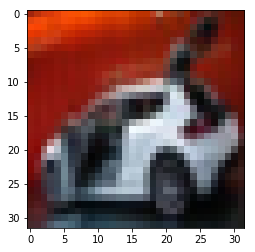

In [101]:
# Visualização do número da imagem
plt.imshow(X_test[6].reshape(32,32,3), cmap="gray")

In [102]:
# Previsão da classe da imagem

# Como é um problema de classificação multiclasse(utilizou-se a função softmax), considera-se que a imagem pertence à classe que
# tem a probabilidade mais alta(pode-se utilizar o argmax, para saber o indice do array com o maior valor).
result = model.predict(image)
result.argmax()

1

In [103]:
# Função com as classes das imagens

def name():
    if result.argmax() == 0:
        print("Avião")
    if result.argmax() == 1:
        print("Automóvel")
    if result.argmax() == 2:
        print("Pássaro")
    if result.argmax() == 3:
        print("Pato")   
    if result.argmax() == 4:
        print("Veado")
    if result.argmax() == 5:
        print("Cão")
    if result.argmax() == 6:
        print("Sapo")       
    if result.argmax() == 7:
        print("Cavalo")   
    if result.argmax() == 8:
        print("Navio")
    if result.argmax() == 9:
        print("Camião")
        

In [104]:
# Previsão do objecto na imagem
name()

Automóvel
